In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [190]:
data = pd.read_csv('MBA.csv')

In [191]:
df=pd.read_csv('MBA.csv')
print(df.head())
print(df.describe())

   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           True  3.30    Business       NaN  710.0   
3               4    Male          False  3.47        STEM     Black  690.0   
4               5    Male          False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management       NaN  
2       5.0             Technology     Admit  
3       6.0             Technology       NaN  
4       5.0             Consulting       NaN  
       application_id          gpa         gmat     work_exp
count     6194.000000  6194.000000  6194.000000  6194.000000
mean      3097.500000     3.250714   651.092993     5.016952
std       1788.198115     0.151541    49.294883     1.032432

In [192]:
le=LabelEncoder()
data['admission']=le.fit_transform(data['admission'])
data

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,0
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,2
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,0
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,2
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,2
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,2
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,2
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,0
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,2


In [193]:
data.dropna(inplace=True)

In [194]:
categorical_columns = data.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print(f"\nEncoding categorical columns: {list(categorical_columns)}")
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)



Encoding categorical columns: ['gender', 'major', 'race', 'work_industry']


In [195]:
X = data.drop('admission', axis=1)  # Features
y = data['admission'] 

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")


Data split into training and testing sets.


In [197]:
k_value = 5
print(f"\nApplying KNN with K = {k_value}")
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train, y_train)


Applying KNN with K = 5


KNeighborsClassifier()

In [198]:
y_pred = knn.predict(X_test)

In [199]:
print("\nModel Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Model Evaluation:
Accuracy Score: 0.8220436280137773
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.19      0.24       120
           1       0.00      0.00      0.00        14
           2       0.87      0.94      0.90       737

    accuracy                           0.82       871
   macro avg       0.40      0.38      0.38       871
weighted avg       0.78      0.82      0.80       871



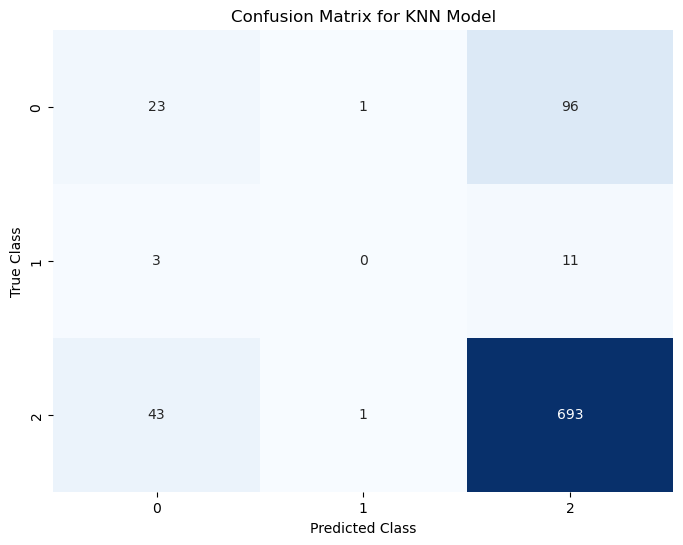

In [200]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [201]:
k_range = range(1, 20)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

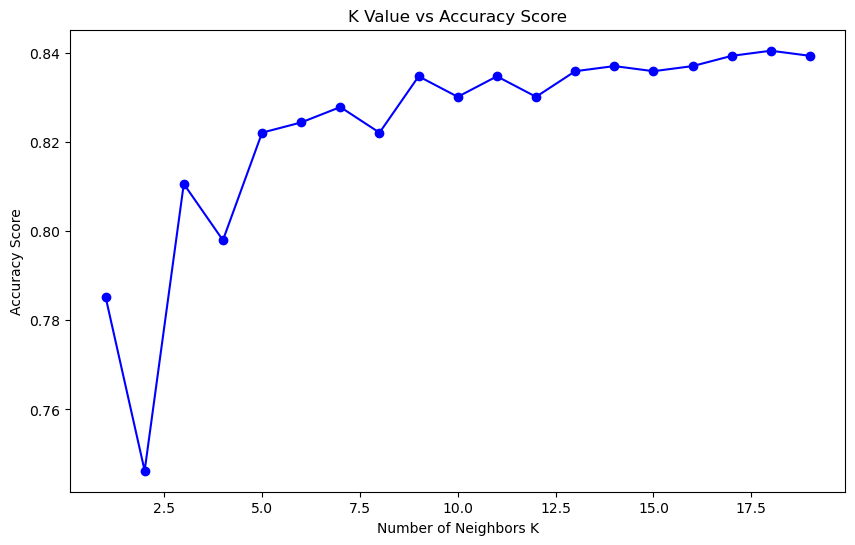

In [202]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title("K Value vs Accuracy Score")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy Score")
plt.show()